In [ ]:
### Code for Log Quality V4 ###

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import numpy as np
import csv
import pandas as pd

In [153]:
file_path = '/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/data-noise.xlsx'
sheet_name = 'v4'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Access and print specific values or columns
print(df['logSize'])

0        100
1        100
2        100
3        100
4        100
       ...  
130    10000
131    10000
132    10000
133    10000
134    10000
Name: logSize, Length: 135, dtype: int64


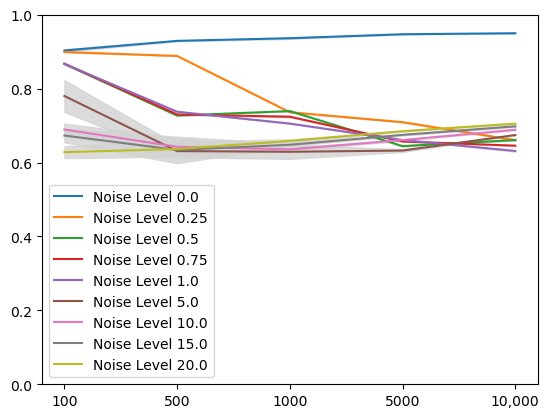

In [154]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1', '5', '10', '15', '20']

group = df[df['noiseType'] == 'oa']

for value in group['noiseLevel'].unique():
    group2 = group[group['noiseLevel'] == value]  # Filter by the current noise level value

    data_to_plot = group2['prec'].tolist()
    std = group2['stdprec'].tolist()
    uplim = []
    lowlim = []
    for i in range(5):
        uplim.append(data_to_plot[i] + std[i])
        lowlim.append(data_to_plot[i] - std[i])
    
    # Check if data_to_plot is not empty
    if data_to_plot:
        plt.plot(x_labels, data_to_plot, label='Noise Level {}'.format(value))
        plt.fill_between(x_labels, uplim, lowlim, color='lightgray', alpha=0.8)
    
    
# for i in range(5):
#     plt.plot(x_labels, data_precision_0[i], label='Noise Level '+y_labels[i]+'%')

plt.ylim(0, 1)
plt.legend()
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/v4_oa.svg', format='svg')
plt.show()

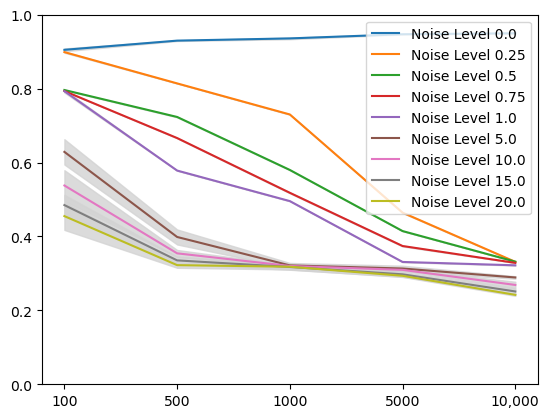

In [155]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1', '5', '10', '15', '20']

group = df[df['noiseType'] == 'ia']

for value in group['noiseLevel'].unique():
    group2 = group[group['noiseLevel'] == value]  # Filter by the current noise level value

    data_to_plot = group2['prec'].tolist()
    std = group2['stdprec'].tolist()
    uplim = []
    lowlim = []
    for i in range(5):
        uplim.append(data_to_plot[i] + std[i])
        lowlim.append(data_to_plot[i] - std[i])
    
    # Check if data_to_plot is not empty
    if data_to_plot:
        plt.plot(x_labels, data_to_plot, label='Noise Level {}'.format(value))
        plt.fill_between(x_labels, uplim, lowlim, color='lightgray', alpha=0.8)
    
    
# for i in range(5):
#     plt.plot(x_labels, data_precision_0[i], label='Noise Level '+y_labels[i]+'%')

plt.ylim(0, 1)
plt.legend()
# plt.savefig('4_oa_1.svg', format='svg')
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/v4_ia.svg', format='svg')
plt.show()

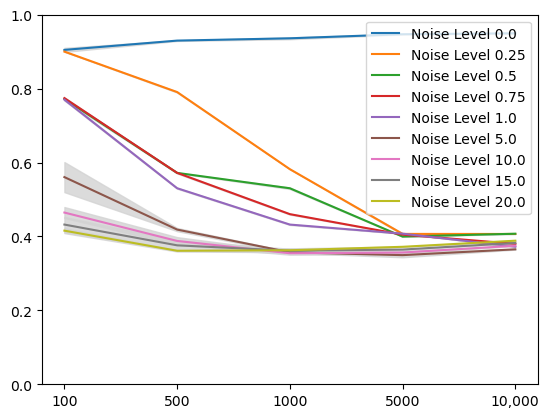

In [156]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1', '5', '10', '15', '20']

group = df[df['noiseType'] == 'ooo']

for value in group['noiseLevel'].unique():
    group2 = group[group['noiseLevel'] == value]  # Filter by the current noise level value

    data_to_plot = group2['prec'].tolist()
    std = group2['stdprec'].tolist()
    uplim = []
    lowlim = []
    for i in range(5):
        uplim.append(data_to_plot[i] + std[i])
        lowlim.append(data_to_plot[i] - std[i])
    
    # Check if data_to_plot is not empty
    if data_to_plot:
        plt.plot(x_labels, data_to_plot, label='Noise Level {}'.format(value))
        plt.fill_between(x_labels, uplim, lowlim, color='lightgray', alpha=0.8)
    
    
# for i in range(5):
#     plt.plot(x_labels, data_precision_0[i], label='Noise Level '+y_labels[i]+'%')

plt.ylim(0, 1)
plt.legend()
# plt.savefig('4_oa_1.svg', format='svg')
plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/v4_ooo.svg', format='svg')
plt.show()

In [157]:
sheet_name2 = 'v4-13.11'
df2 = pd.read_excel(file_path, sheet_name=sheet_name2)
print(df2['dev_pre'])

0      0.096940
1      0.014347
2      0.072463
3      0.077655
4      0.083785
         ...   
295    0.049989
296    0.082821
297    0.083081
298    0.084037
299    0.088279
Name: dev_pre, Length: 300, dtype: float64


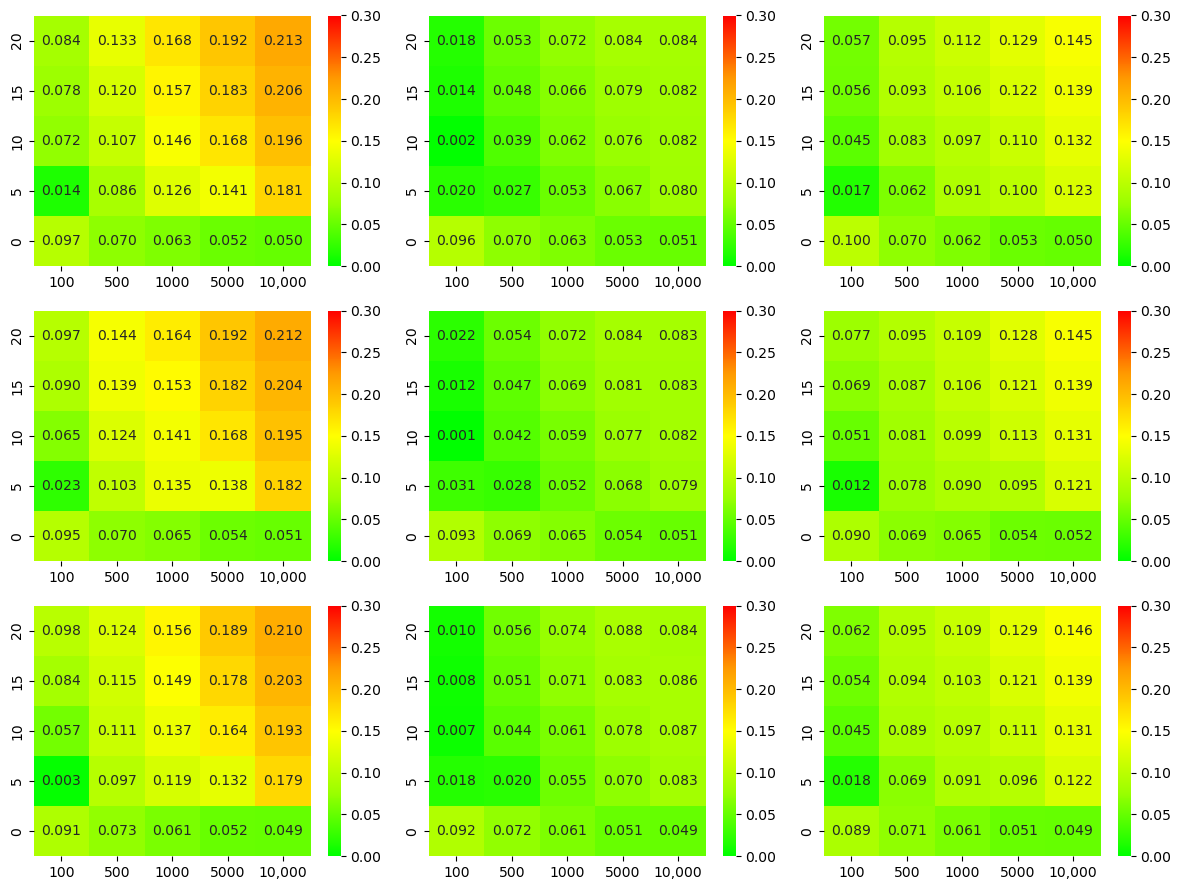

In [158]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 9

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['dev_pre']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    data_slice = df_a[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

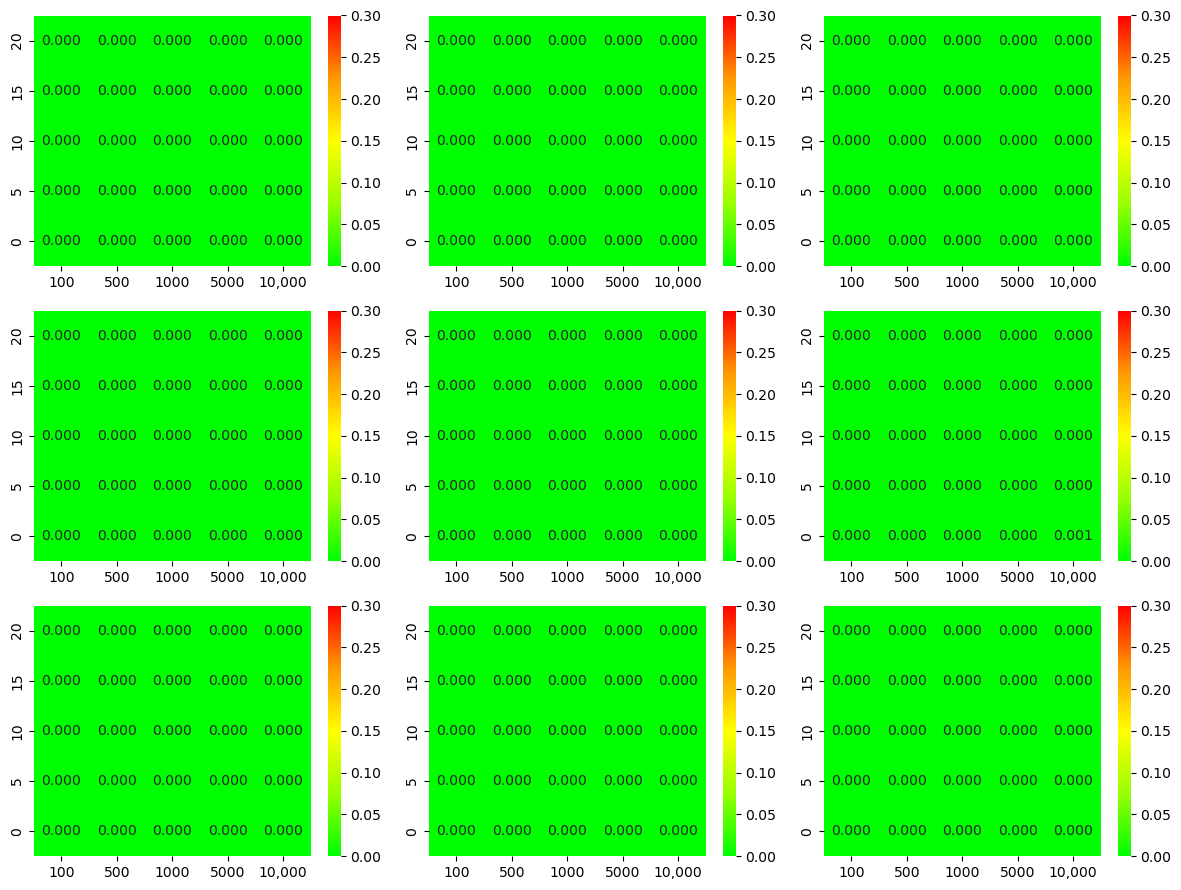

In [129]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '5', '10', '15', '20']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 9

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['dev_rec']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    data_slice = df_a[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

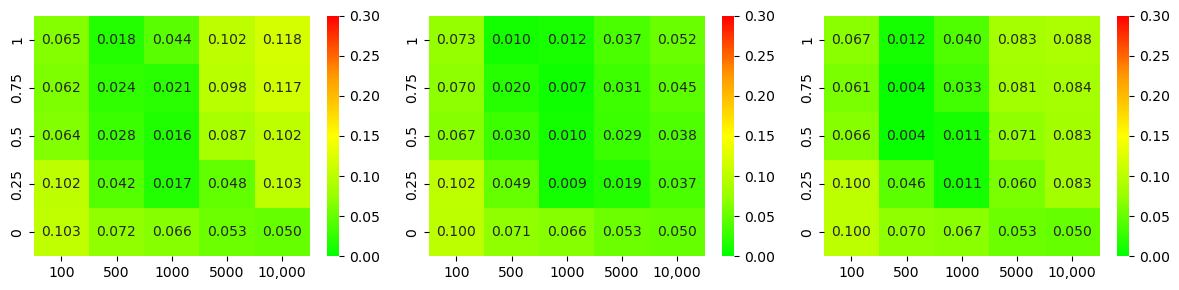

In [102]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['dev_pre']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df_a[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

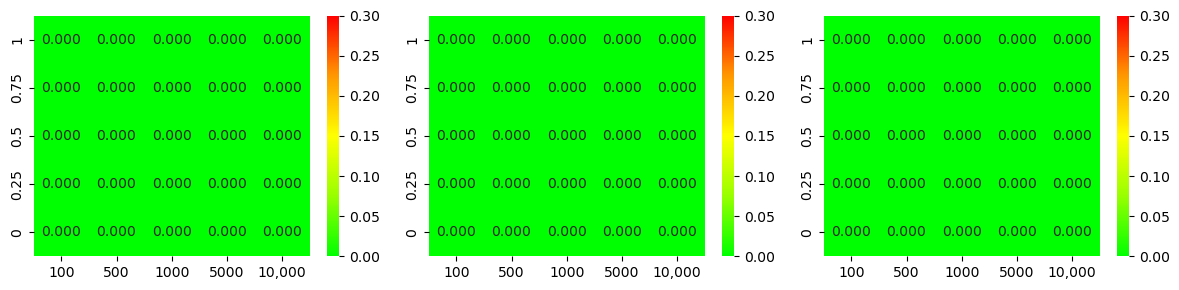

In [130]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['dev_rec']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df_a[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

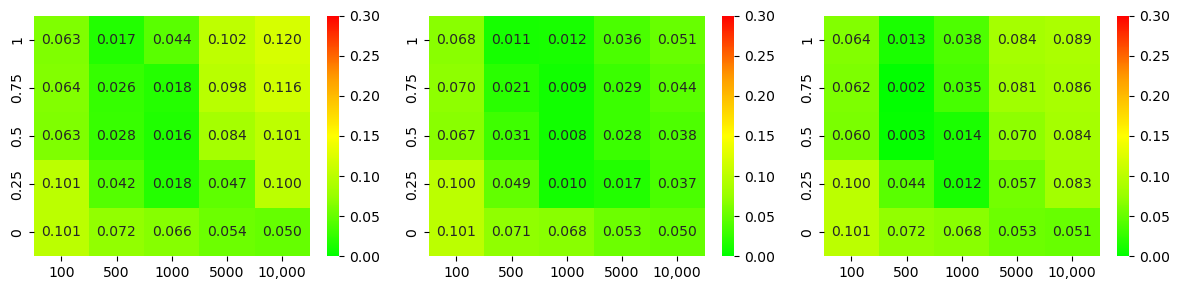

In [137]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['dev_pre_constg']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df_a[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

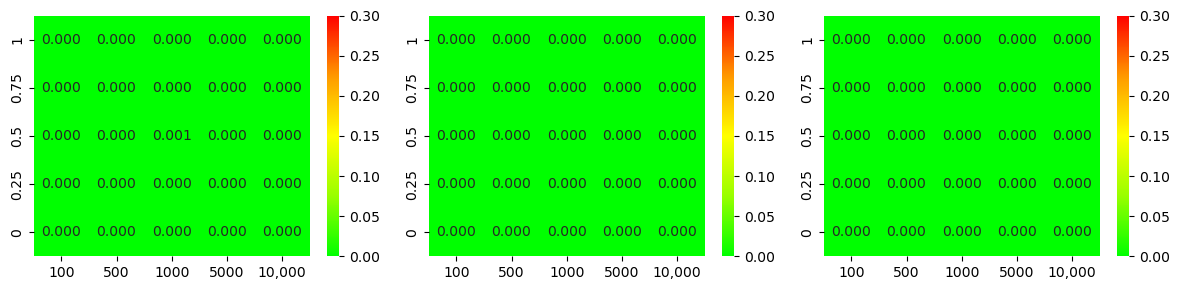

In [131]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['dev_rec_constg']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df_a[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=0, vmax=0.3, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

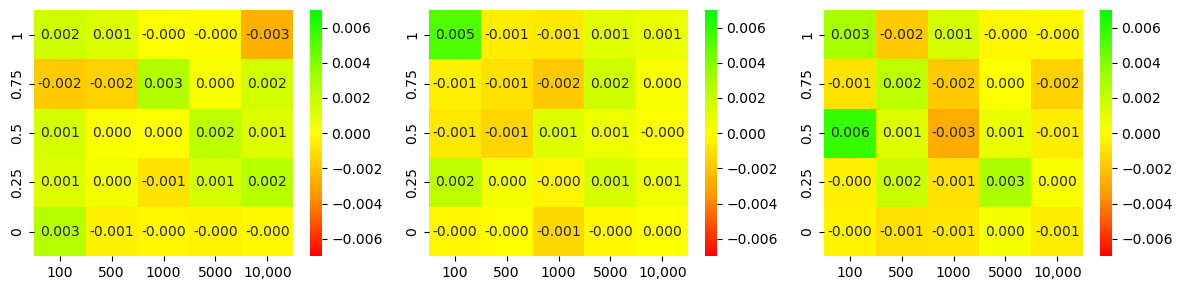

In [128]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]
# colors = ["#FF0000", "#FF9900", "#FFFF00", "#99FF00", "#00FF00"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['prec-g-affect']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df_a[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#FF0000", "#FF9900", "#FFFF00", "#99FF00", "#00FF00"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
    
    minim = -0.007
    maxim = 0.007

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=minim, vmax=maxim, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

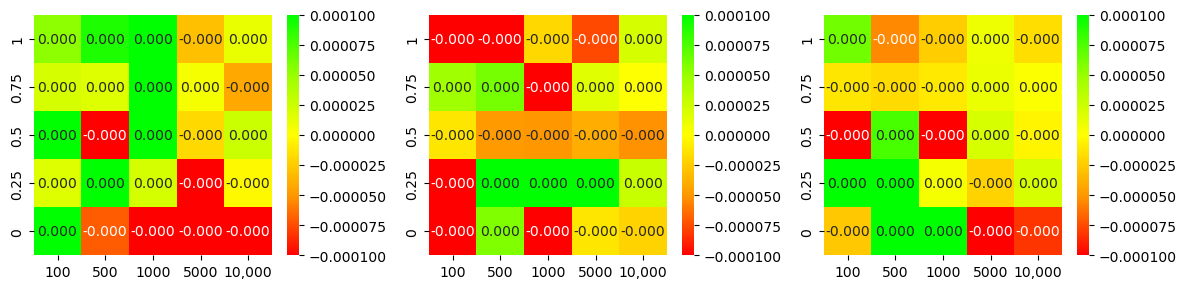

In [135]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1']

heatmap_rows = 5
heatmap_cols = 5

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]
# colors = ["#FF0000", "#FF9900", "#FFFF00", "#99FF00", "#00FF00"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df2['rec-g-affect']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    j = i + 9
    data_slice = df_a[j * data_per_heatmap: (j + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
    colors = ["#FF0000", "#FF9900", "#FFFF00", "#99FF00", "#00FF00"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
    
    minim = -0.0001
    maxim = 0.0001

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, vmin=minim, vmax=maxim, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()

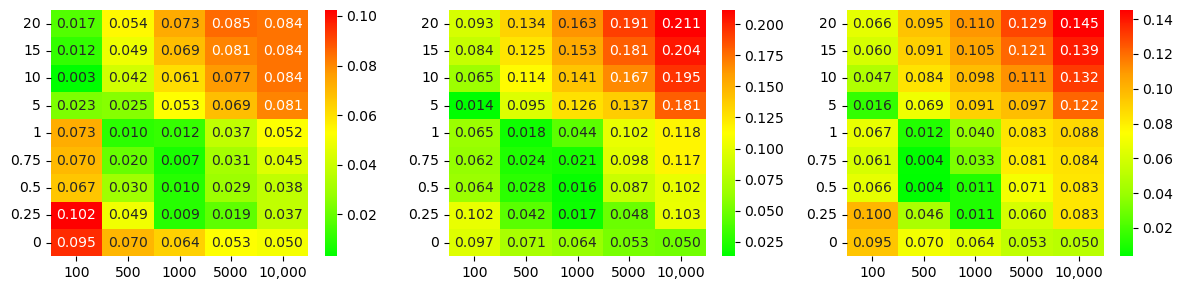

In [145]:
x_labels = ['100', '500', '1000', '5000', '10,000']
y_labels = ['0', '0.25', '0.5', '0.75', '1', '5', '10', '15', '20']

heatmap_rows = 5
heatmap_cols = 9

num_heatmaps = 3

boundaries = [0, 0.1, 0.4, 0.6, 0.9, 1.0]
colors = ["#00FF00", "#99FF00", "#FFFF00", "#FF9900", "#FF0000"]
# colors = ["#FF0000", "#FF9900", "#FFFF00", "#99FF00", "#00FF00"]

data_per_heatmap = heatmap_rows * heatmap_cols

# Create a custom colormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)

df_a = df['dev_prec']

# Create the heatmap with the custom colormap
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Flatten the 2D array of axes to iterate over them
axes = axes.flatten()

# Iterate through each heatmap
for i in range(num_heatmaps):
    data_slice = df_a[i * data_per_heatmap: (i + 1) * data_per_heatmap]

    # Reshape the data into a 2D array (5x5)
    heatmap_data = np.array(data_slice).reshape(heatmap_rows, heatmap_cols).T
    
#     colors = ["#FF0000", "#FF9900", "#FFFF00", "#99FF00", "#00FF00"]

    # Create a custom colormap
    custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
    
    minim = -0.007
    maxim = 0.007

    # Create the heatmap with the custom colormap
    ax = sns.heatmap(heatmap_data, annot=True, ax=axes[i], cmap=custom_cmap, cbar=True, xticklabels=x_labels, yticklabels=y_labels, fmt='.3f')
    ax.invert_yaxis()
#     ax.set_title(f'Heatmap {i + 1}')

plt.tight_layout()
# plt.savefig('/Users/anandik/OneDrive - The University of Melbourne/GR/Experiments/LogQualityV3/heatmap_recall.svg', format='svg')
plt.show()